In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from pylab import rcParams
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
import scipy
from scipy.special import softmax

In [ ]:
data = pd.read_csv('/content/twitter_data.csv')

In [ ]:
data.head()

,Unnamed: 0,Date,channel,tweet,Modi,Rahul Gandhi,Arvind Kejriwal,Amit Shah,BJP,Congress,AAP
0,0,2023-06-28 13:12:12+00:00,republic,#FadnavisSpeaksToArnab | Maharashtra Deputy CM...,0,0,0,0,0,0,0
1,1,2023-06-28 13:10:00+00:00,timesofindia,4-lane highway to Goa by December? Activists d...,0,0,0,0,0,0,0
2,2,2023-06-28 13:08:45+00:00,CNNnews18,#UCC dividing #Oppositionunity?\n\nPolitical A...,1,0,0,0,1,0,0
3,3,2023-06-28 13:08:35+00:00,timesofindia,"#ISRO chief S Somnath says, ""Currently the #Ch...",0,0,0,0,0,0,0
4,4,2023-06-28 13:08:26+00:00,republic,#LIVE | I don't remember clearly but my people...,0,0,0,0,0,0,0


In [ ]:
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(data['tweet'])

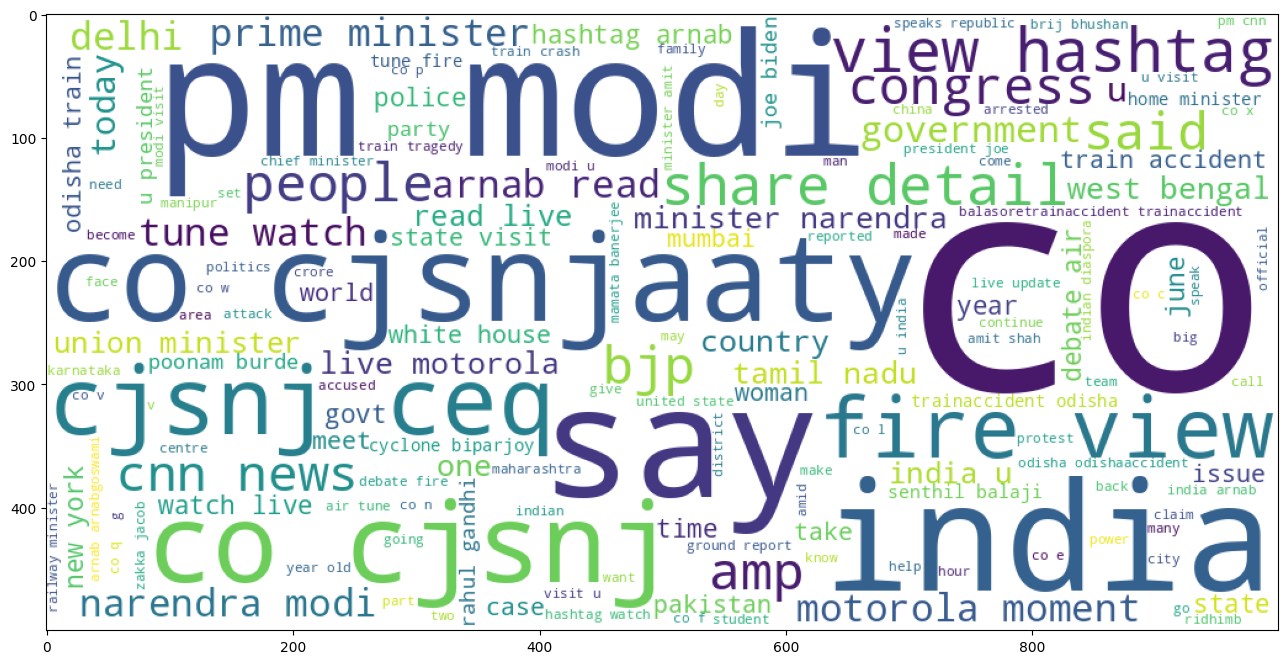

In [ ]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
data.insert(3, "preprced", corpus)

In [ ]:
data.head()

,Unnamed: 0,Date,channel,preprced,tweet,Modi,Rahul Gandhi,Arvind Kejriwal,Amit Shah,BJP,Congress,AAP
0,0,2023-06-28 13:12:12+00:00,republic,fadnavisspeakstoarnab maharashtra deputy cm de...,#FadnavisSpeaksToArnab | Maharashtra Deputy CM...,0,0,0,0,0,0,0
1,1,2023-06-28 13:10:00+00:00,timesofindia,lane highway goa december activist doubt promi...,4-lane highway to Goa by December? Activists d...,0,0,0,0,0,0,0
2,2,2023-06-28 13:08:45+00:00,CNNnews18,ucc dividing oppositionunity political analyst...,#UCC dividing #Oppositionunity?\n\nPolitical A...,1,0,0,0,1,0,0
3,3,2023-06-28 13:08:35+00:00,timesofindia,isro chief somnath say currently chandrayaan s...,"#ISRO chief S Somnath says, ""Currently the #Ch...",0,0,0,0,0,0,0
4,4,2023-06-28 13:08:26+00:00,republic,live remember clearly people managed identify ...,#LIVE | I don't remember clearly but my people...,0,0,0,0,0,0,0


In [ ]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)
labels = ['Negative', 'Neutral', 'Positive']

In [ ]:
encoded_tweets = []
output = []

for i in range(15561):
  encode_tweets = tokenizer(data['preprced'][i], return_tensors = 'pt')
  output_encode = model(**encode_tweets)
  scores = output_encode[0][0].detach().numpy()
  scores = softmax(scores)
  if scores[0] == scores.max():
    output.append(2)
  elif scores[1] == scores.max():
    output.append(0)
  elif scores[2] == scores.max():
    output.append(1)


In [18]:
data.drop(data.tail(20000-15561).index,
        inplace = True)
data['sentiment'] = output

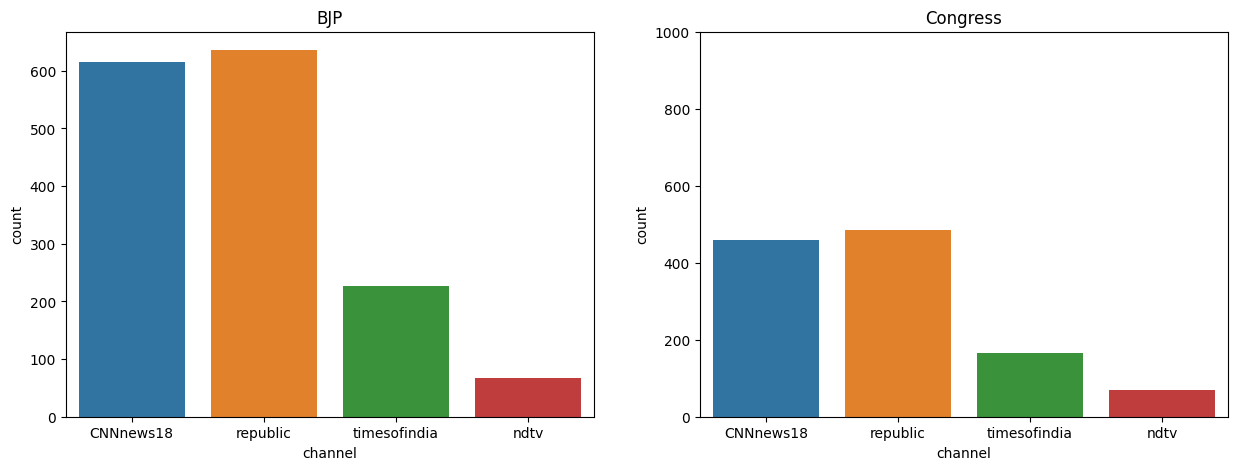

In [23]:
bjp=data.loc[data['BJP'] == 1]
congress=data.loc[data['Congress'] == 1]

fig, axes = plt.subplots(1, 2,figsize=(15,5))
plt.ylim(0, 1000)
sns.countplot(x="channel", data=bjp, ax=axes[0]).set_title("BJP")
sns.countplot(x='channel',data=congress, ax=axes[1]).set_title("Congress")
amit=data.loc[data['Amit Shah'] == 1]
arvind=data.loc[data['Arvind Kejriwal'] == 1]



Text(0.5, 1.0, 'Arvind Kejriwal')

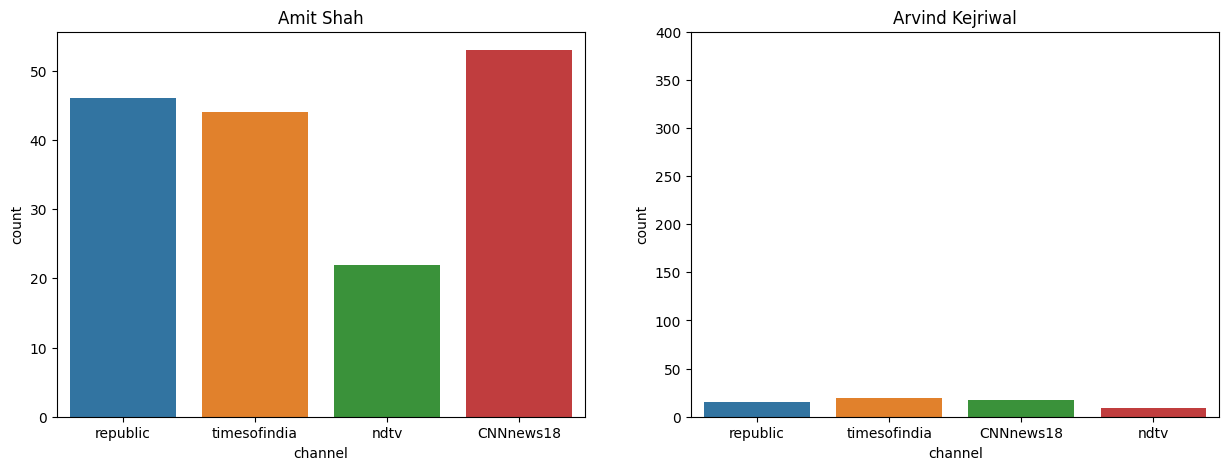

In [21]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
plt.ylim(0, 400)
sns.countplot(x="channel", data=amit, ax=axes[0]).set_title("Amit Shah")
sns.countplot(x='channel',data=arvind, ax=axes[1]).set_title("Arvind Kejriwal")

Text(0.5, 1.0, 'Rahul Gandhi')

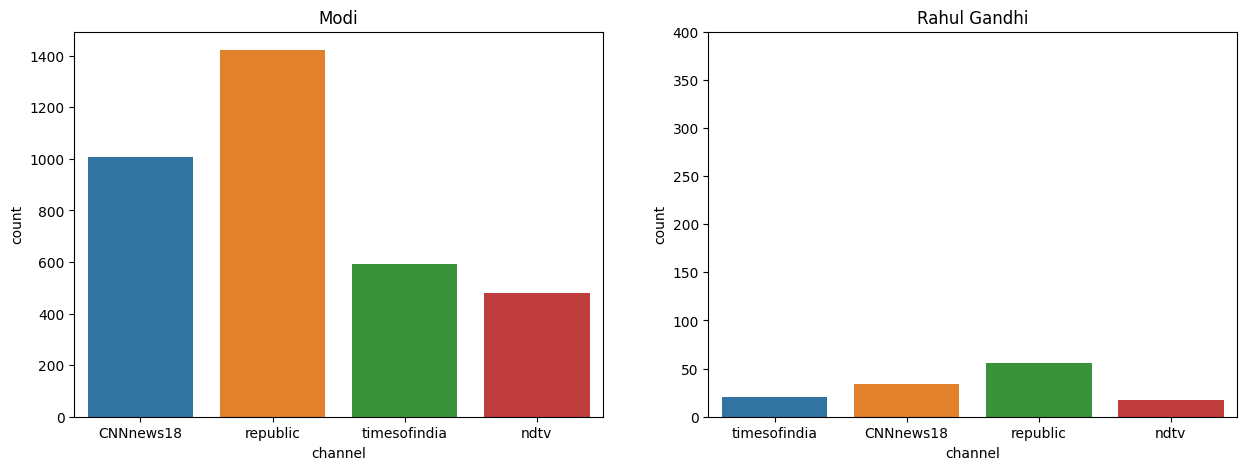

In [31]:
modi=data.loc[data['Modi'] == 1]
rahul_gandhi=data.loc[data['Rahul Gandhi'] == 1]
bjp = data.loc[data['BJP'] == 1]
congress = data.loc[data['Congress'] == 1]
amit = data.loc[data['Amit Shah'] == 1]
arvind = data.loc[data['Arvind Kejriwal'] == 1]

fig, axes = plt.subplots(1, 2,figsize=(15,5))
plt.ylim(0, 400)
sns.countplot(x="channel", data=modi, ax=axes[0]).set_title("Modi")
sns.countplot(x='channel',data=rahul_gandhi, ax=axes[1]).set_title("Rahul Gandhi")

In [25]:
modi.groupby(['channel','sentiment']).sum()

<ipython-input-25-bff9e0d2b7fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  modi.groupby(['channel','sentiment']).sum()


Unnamed: 0  Modi  Rahul Gandhi  Arvind Kejriwal  \
channel      sentiment                                                    
CNNnews18    0             4064494   860             1                7   
             1              525463   122             0                0   
             2              111761    27             0                1   
ndtv         0             1905742   416             0                0   
             1              274062    61             0                0   
             2               15880     3             0                0   
republic     0             6381138  1213            20                2   
             1              902083   178             0                0   
             2               92879    31             0                0   
timesofindia 0             2821718   487             1                1   
             1              531239    89             0                0   
             2              108219    17             0                0   

                        Amit Shah  BJP  Congress  AAP  
channel      sentiment                                 
CNNnews18    0                  8   72        72    7  
             1                  0    1        17    0  
             2                  0   12         7    0  
ndtv         0                  3    7        31    1  
             1                  0    1         1    0  
             2                  2    0         1    0  
republic     0                  9   88       131   16  
             1                  1    5         9    0  
             2                  0    6         5    0  
timesofindia 0                  7   25        32    2  
             1                  0    0         3    0  
             2                  1    2         7    0

In [39]:
rahul_gandhi.groupby(['channel', 'sentiment']).sum()

<ipython-input-39-c29b6d8db7c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rahul_gandhi.groupby(['channel', 'sentiment']).sum()


Unnamed: 0  Modi  Rahul Gandhi  Arvind Kejriwal  \
channel      sentiment                                                    
CNNnews18    0              146808     1            33                2   
             2               13418     0             1                0   
ndtv         0               87014     0            17                0   
republic     0              607000    20            54                0   
             2               28905     0             2                0   
timesofindia 0              153413     1            17                1   
             2               14225     0             3                0   

                        Amit Shah  BJP  Congress  AAP  
channel      sentiment                                 
CNNnews18    0                  3   13        22    1  
             2                  0    0         0    0  
ndtv         0                  0    1         6    1  
republic     0                  0   17        44    0  
             2                  0    0         0    0  
timesofindia 0                  0    6         4    0  
             2                  0    0         1    0

Text(0.5, 1.0, 'Congress')

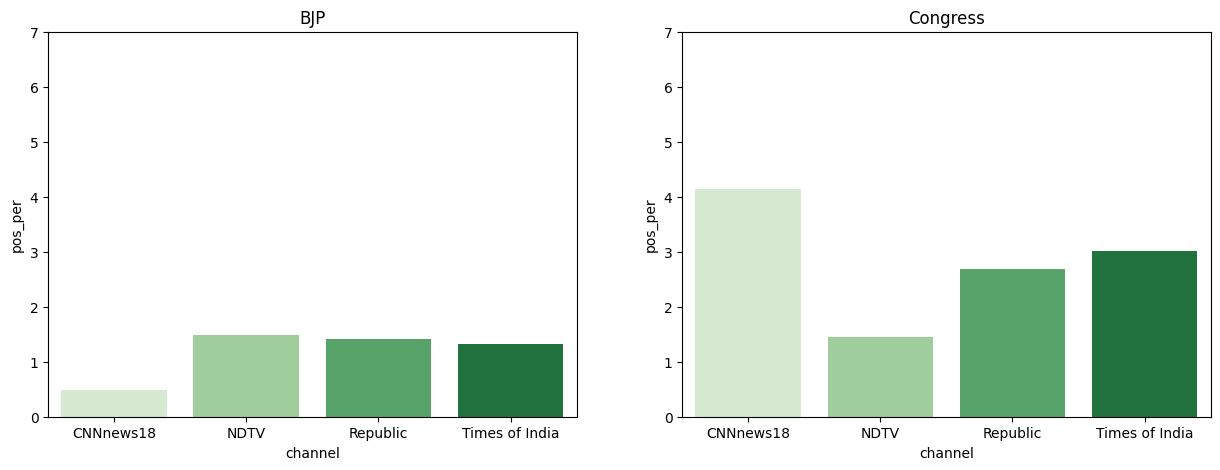

In [45]:
groups = bjp.groupby(['channel','sentiment'])
group = bjp.groupby('channel')
a=[]
a.append(100*len(groups.get_group(('CNNnews18',1)))/len(group.get_group('CNNnews18')))
a.append(100*len(groups.get_group(('ndtv',1)))/len(group.get_group('ndtv')))
a.append(100*len(groups.get_group(('republic',1)))/len(group.get_group('republic')))
a.append(100*len(groups.get_group(('timesofindia',1)))/len(group.get_group('timesofindia')))

groups = congress.groupby(['channel', 'sentiment'])
group = congress.groupby('channel')
b = []
b.append(100*len(groups.get_group(('CNNnews18',1)))/len(group.get_group('CNNnews18')))
b.append(100*len(groups.get_group(('ndtv',1)))/len(group.get_group('ndtv')))
b.append(100*len(groups.get_group(('republic',1)))/len(group.get_group('republic')))
b.append(100*len(groups.get_group(('timesofindia',1)))/len(group.get_group('timesofindia')))

fig, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].set_ylim(0,7)
axes[1].set_ylim(0,7)
channel = ['CNNnews18', 'NDTV', 'Republic', 'Times of India']
d=pd.DataFrame({'channel':channel,'pos_per':a})
e=pd.DataFrame({'channel':channel,'pos_per':b})


sns.barplot(x='channel',y='pos_per',data=d,ax=axes[0], palette=("Greens")).set_title("BJP")
sns.barplot(x='channel',y='pos_per',data=e,ax=axes[1], palette=("Greens")).set_title("Congress")